In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [8]:
df = pd.read_csv("concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


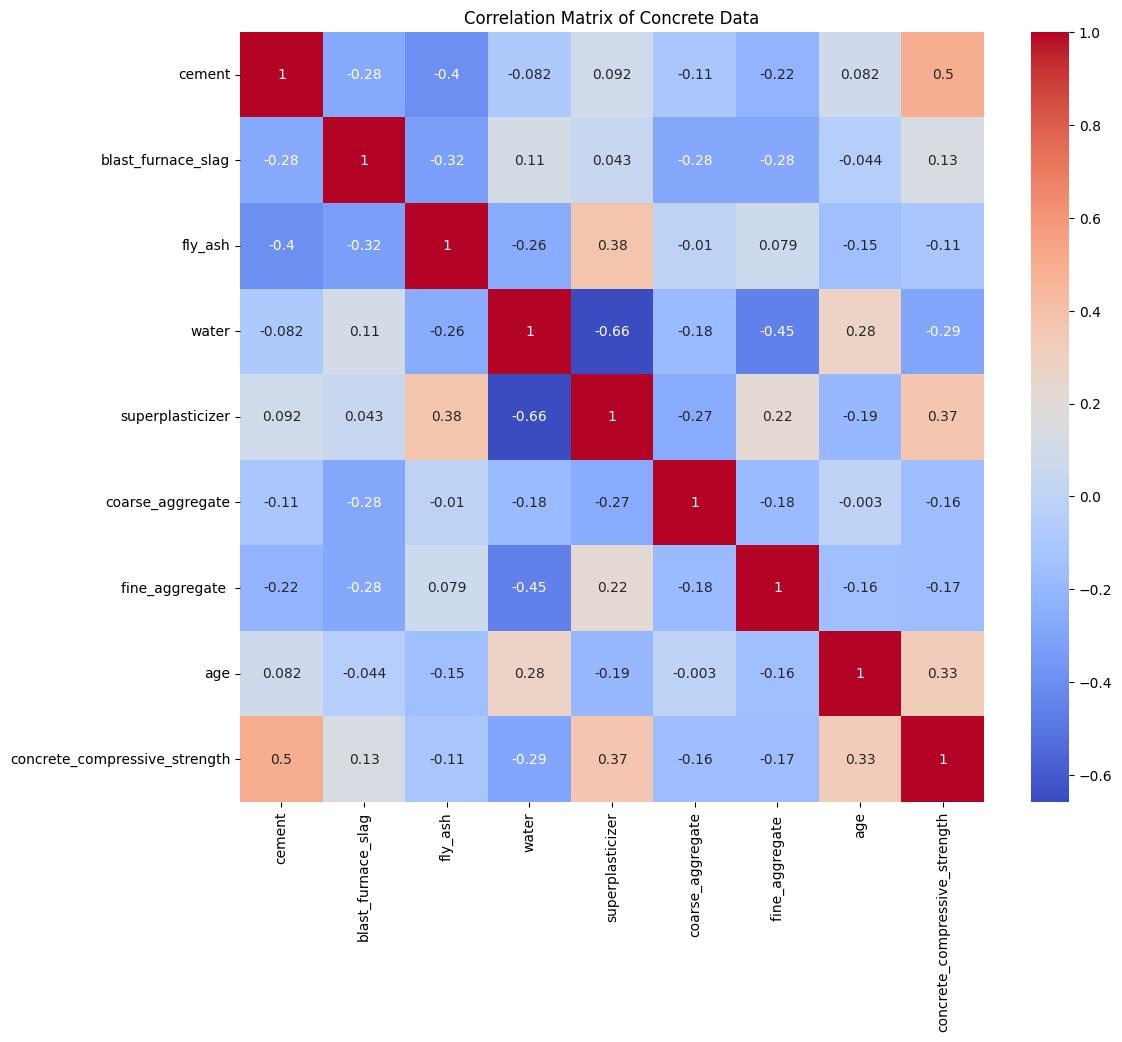

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Concrete Data')
plt.show()

In [ ]:
X = df.drop(["concrete_compressive_strength"], axis=1)
y = df["concrete_compressive_strength"]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test, y_pred)

0.9356416702103968

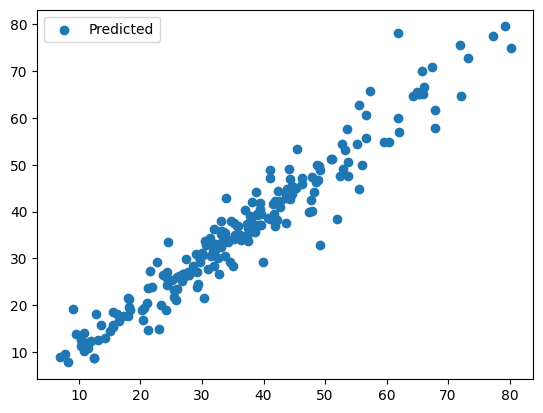

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.legend(["Predicted", "Original", "Regression Line"])
plt.show()

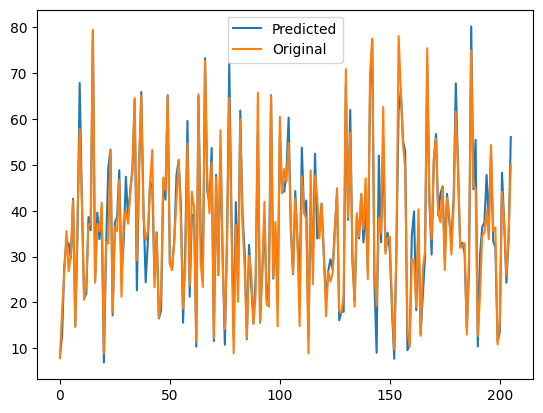

In [ ]:
plt.figure()
plt.plot(y_test.tolist())
plt.plot(y_pred.tolist())
plt.legend(["Predicted", "Original", "Regression Line"])
plt.show()

In [ ]:
y_pred

array([ 7.8278775, 18.267574 , 26.499166 , 35.548523 , 26.78581  ,
       30.401655 , 42.26295  , 14.643005 , 38.021248 , 57.81588  ,
       42.155205 , 20.593512 , 23.951149 , 37.07549  , 36.836037 ,
       79.475716 , 24.298347 , 37.187733 , 35.459698 , 41.778217 ,
        8.891847 , 33.18886  , 32.837307 , 53.054897 , 17.819273 ,
       36.40462  , 35.569813 , 46.769318 , 21.220999 , 37.89863  ,
       39.96677  , 37.174904 , 43.848003 , 48.930058 , 64.595795 ,
       29.209646 , 49.95068  , 65.08235  , 38.635883 , 33.57304  ,
       35.548523 , 45.964012 , 53.27826  , 23.290297 , 35.012104 ,
       16.662237 , 21.461315 , 47.256874 , 44.49383  , 65.0119   ,
       28.411207 , 27.031796 , 33.48908  , 42.489357 , 51.13845  ,
       38.33937  , 18.663246 , 28.44428  , 54.739033 , 23.656345 ,
       44.151604 , 40.636272 , 11.345251 , 65.42592  , 28.407553 ,
       23.390272 , 72.74773  , 46.992172 , 39.436596 , 50.520535 ,
       12.263827 , 47.288345 , 26.029322 , 57.559452 , 29.1480